## 1. Double (and more) pendulum
>a. Make a notebook that solves the double pendulum using (11.37) and (11.38) in Taylor Section 11.4 (i.e., don't assume the small angle approximation). Implement the pendulum code as a Python class (as in our examples). __You can use either the Euler-Lagrange or Hamiltonian equations.__ The basic output will be plots of the two angles as a function of time for the given initial conditions.
<br>b. Show that the system is chaotic for initial conditions beyond the small angle approximation.
<br>c. Add Markdown/LaTeX documentation.
<br>d. Extend your simulation to three pendulums.
<br>e. Add widgets to control the simulation and/or animate it.

Given Equations:
$\begin{align}
  U(\phi_1 ,\phi_2)&=(m_1+m_2)gL_1(1-cos\phi_1)+m_2gL_2(1-cos\phi_2) \qquad\qquad\qquad(11.37)\\
  T(\phi_1 ,\phi_2)&=\frac12 (m_1+m_2)L_1^2\dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1\dot\phi_2 cos(\phi_1 -\phi_2)
  +\frac12 m_2 L_2^2\dot\phi_2^2 \space\quad(11.38)
\end{align}$

The Lagrange's Equation:

$\begin{align}
  \mathcal{L} &= T-U 
  \rightarrow \frac d{dt} \frac {\partial \mathcal L}{\partial\dot \phi_i}=\frac {\partial\mathcal L}{\partial   \phi_i}  \\
  a\ddot\phi_1 + b\ddot\phi_2 &= e \\
  c\ddot\phi_1 + d\ddot\phi_2 &= f \\
  \rightarrow\mathbf{M}\boldsymbol{\ddot\phi} &= \mathbf{F} \rightarrow\boldsymbol{\ddot\phi} = \mathbf{M}^{-1}\mathbf{F}
\end{align}$

Where a-f are terms that don't include $\ddot\phi_i$  
In the end:   
$\begin{align}
\qquad\qquad a&=(m_1+m_2)L_1^2 \\
    b&= m_2L_1L_2cos(\phi_1-\phi_2) \\
    c&= m_2L_1L_2cos(\phi_1-\phi_2) \\
    d&= m_2L_2^2 \\ 
    e&= -[(m_1+m_2)gL_1sin\phi_1+m_2L_1L_2sin(\phi_1-\phi_2)\dot\phi_2^2] \\
    f&= m_2L_1L_2sin(\phi_1-\phi_2)\dot\phi_1^2-m_2gL_1sin\phi_2
  \;    
\end{align}$

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [2]:
class LagrangianDoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 & L2 : float
            length of the two pendulums
    g : float
        gravitational acceleration at the earth's surface
    mass 1 & 2 : float
                mass of each pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2

    
    def dy_dt(self, t, y): # Code is off, probably
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with:
             y[0] = phi1(t) 
             y[1] = dphi1/dt
             y[2] = phi2(t)
             y[3] = dphi2/dt
            
        Returns [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        -------
        
        """
        # Initiates Constants to avoid more 'self.'
        L1 = self.L1 
        L2 = self.L2 
        g = self.g 
        M = self.m1+self.m2 
        m2 = self.m2 
        
        # Follows markdown equations
        a = M*L1**2
        b = m2*L1*L2*np.cos(y[0]-y[2])
        c = m2*L1*L2*np.cos(y[0]-y[2])
        d = m2*L2**2
        
        e = -m2*L1*L2*np.sin(y[0]-y[2])*y[3]**2-M*g*L1*np.sin(y[0])
        f = m2*L1*L2*np.sin(y[0]-y[2])*y[1]**2-m2*g*L2*np.sin(y[2])
        
        u = 1/(a*d-b*c)
        X1 = u*(d*e-b*f)
        X2 = u*(-c*e+a*f)
        
        #print("1", X1*[[e],[f]])
        return [y[1], X1, y[3], X2]
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
# Given Values within the small angle approximation
phi_0 = [.1,.01]
phi_dot_0 = [0,0]
L1 = 1.
L2 = 1
m1 = 5.
m2 = 1

# Time
t_start = 0.
t_end = 100.
delta_t = 0.001
t_pts = np.arange(t_start, t_end+delta_t, delta_t)

# Simulates the double pendulum
p1 = LagrangianDoublePendulum(L1=L1, L2=L2, m1=m1, m2=m2)
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi_0[0], phi_dot_0[0], 
                                              phi_0[1], phi_dot_0[1])
print("Done") # Tells me when the code has finished simulating

Done


(<matplotlib.axes._subplots.AxesSubplot at 0x18568ab4d88>,
 <matplotlib.lines.Line2D at 0x18568d4b448>)

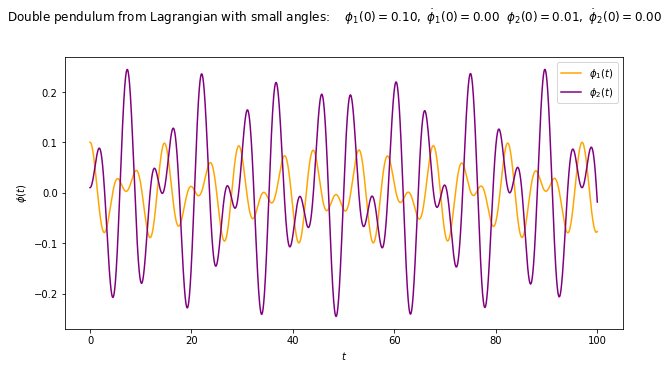

In [6]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')

fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian with small angles:  ' + \
                rf'  $\phi_1(0) = {phi_0[0]:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi_dot_0[0]:.2f}$' + \
                rf'  $\phi_2(0) = {phi_0[1]:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi_dot_0[1]:.2f}$' #+ \
                #'\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='Orange',
            label=r'$\phi_1(t)$',
            ax=ax_a)  
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='Purple',
            label=r'$\phi_2(t)$', 
            ax=ax_a)

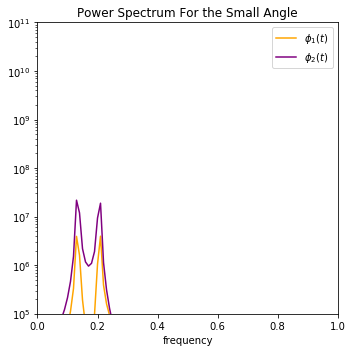

In [7]:
# Same code from example which generates powerspectrums
# Altered to show two power spectrums on the same graph
start, stop = start_stop_indices(t_pts, t_start, t_end)    
signal1 = phi1[start:stop]
signal2 = phi2[start:stop]
power_spectrum1 = np.abs(np.fft.fft(signal1))**2
power_spectrum2 = np.abs(np.fft.fft(signal2))**2
freqs1 = np.fft.fftfreq(signal1.size, delta_t)
freqs2 = np.fft.fftfreq(signal2.size, delta_t)
idx1 = np.argsort(freqs1)
idx2 = np.argsort(freqs2)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs1[idx1], power_spectrum1[idx1], color='orange', 
               label = r'$\phi_1(t)$')
ax_ps.semilogy(freqs2[idx2], power_spectrum2[idx2], color='purple', 
               label = r'$\phi_2(t)$')
ax_ps.set_xlim(0, 1.)
ax_ps.legend()
ax_ps.set_ylim(1.e5, 1.e11)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum For the Small Angle')

fig_ps.tight_layout()

(<matplotlib.axes._subplots.AxesSubplot at 0x185699db5c8>,
 <matplotlib.lines.Line2D at 0x185699ff748>)

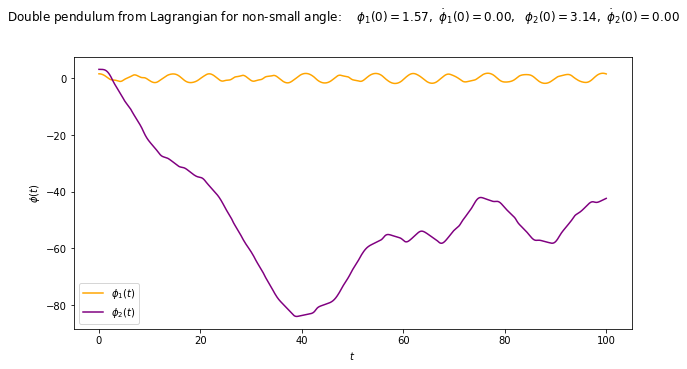

In [8]:
# Not within the small angle approximation
phi_0 = [np.pi/2,np.pi]
phi_dot_0 = [0,0]

phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi_0[0], phi_dot_0[0], 
                                              phi_0[1], phi_dot_0[1])

# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi_1$', r'$d\phi_1/dt$')

fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian for non-small angle:  ' + \
                rf'  $\phi_1(0) = {phi_0[0]:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi_dot_0[0]:.2f},$' + \
                rf'  $\phi_2(0) = {phi_0[1]:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi_dot_0[1]:.2f}$' #+ \
                #'\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='Orange',
            label=r'$\phi_1(t)$', 
            #title=r'$\phi_1(t)$', 
            ax=ax_a)  
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='Purple',
            label=r'$\phi_2(t)$', 
            #title=r'$\phi_2(t)$', 
            ax=ax_a) 

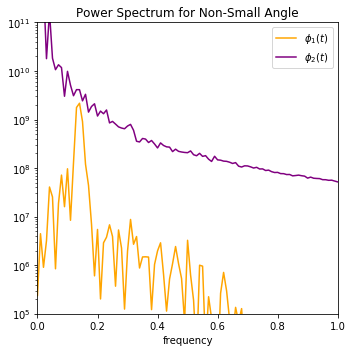

In [9]:
# Same code from example which generates powerspectrums
# Altered to show two power spectrums on the same graph
signal1 = phi1[start:stop]
signal2 = phi2[start:stop]
power_spectrum1 = np.abs(np.fft.fft(signal1))**2
power_spectrum2 = np.abs(np.fft.fft(signal2))**2
freqs1 = np.fft.fftfreq(signal1.size, delta_t)
freqs2 = np.fft.fftfreq(signal2.size, delta_t)
idx1 = np.argsort(freqs1)
idx2 = np.argsort(freqs2)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs1[idx1], power_spectrum1[idx1], color='orange', 
               label = r'$\phi_1(t)$')
ax_ps.semilogy(freqs2[idx2], power_spectrum2[idx2], color='purple', 
               label = r'$\phi_2(t)$')
ax_ps.set_xlim(0, 1.)
ax_ps.legend()
ax_ps.set_ylim(1.e5, 1.e11)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum for Non-Small Angle')

fig_ps.tight_layout()

### B) As seen from the two sets of graphs above, only the small angle will be non-chaotic while the non-small will be chaotic. This can specifically be seen in the power spectrum graphs of the two sets. In the small angle, there are only one to a couple of clean peaks representing the frequencies of oscillation. Outside of the small angle, the power spectrum no longer has clean peaks as it appears spiky. This represents the numerous, if not infinite, number of frequencies for oscillation of the double pendulum.

## Animation Beginning
With a little more time, I will also submit an animation

In [10]:
from matplotlib import animation, rc
from IPython.display import HTML

In [27]:
# Sets up the code that will become an animation
m1 = 1.
m2 = m1
L1 = 1.
L2 = L1

# Time Initiation
t_start = 0.
t_end = 100.
delta_t = 0.1
t_pts = np.arange(t_start, t_end+delta_t, delta_t)

phi_0 = [np.pi/2,np.pi]
phi_dot_0 = [0,0]

phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi_0[0], phi_dot_0[0], 
                                              phi_0[1], phi_dot_0[1])

# Rotates the pendulum to fit the simulation
phi1 = np.array(phi1) - np.pi/2
phi2 = np.array(phi2) - np.pi/2

# Converts the masses into cartesian points
x1 = L1*np.cos(phi1)
y1 = L1*np.sin(phi1)
x2 = x1 + L2*np.cos(phi2)
y2 = y1 + L2*np.sin(phi2)

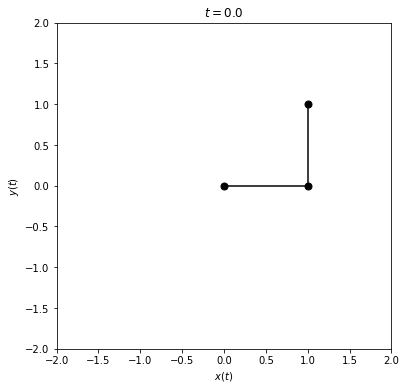

In [39]:
def Pen(x1, y1, x2, y2, t):
    """
    Given two sets of coordinates and a time in relation to said coordinates, 
    the function will output three cartesian points: the origin, mass 1, and 
    mass 2. These are all the progran needs to make a cartesian plot of the 
    double pendulum.
    """
    index = int(t/(0.1))
    x = [0,x1[index], x2[index]]
    y = [0, y1[index], y2[index]]
    return x, y

fig_array = plt.figure(figsize=(6,6), num='Pen')

ax_array = fig_array.add_subplot(1, 1, 1)
ax_array.set_xlim(-2*L1, 2*L1)
ax_array.set_ylim(-2*L1, 2*L1)
ax_array.set_xlabel(r'$x(t)$')
ax_array.set_ylabel(r'$y(t)$')
ax_array.set_title(rf'$t = {t_pts[0]:.1f}$')
x, y = Pen(x1,y1,x2,y2,0)
line, =ax_array.plot(x,y,'ok-', markersize = 7) # Plot of the masses

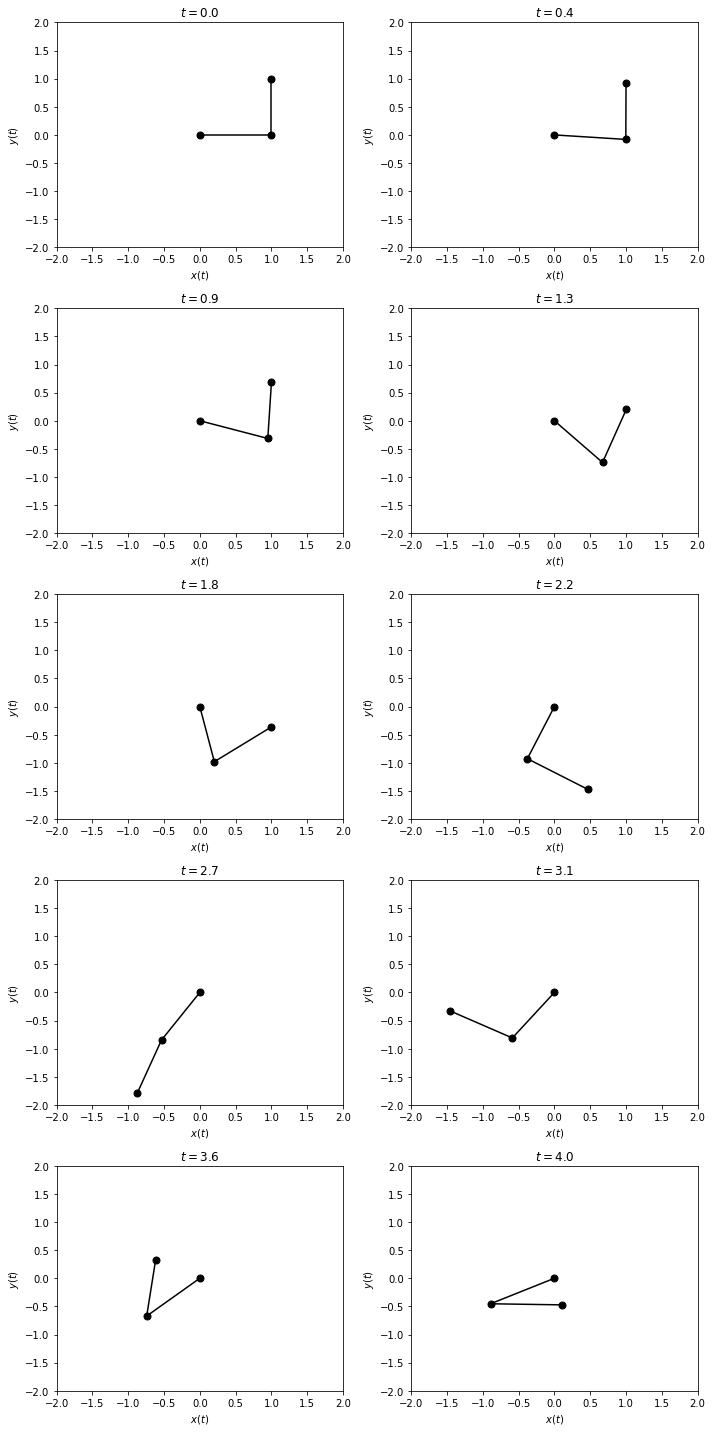

In [41]:
# Preliminary animation, still a work in progress
t_array = np.linspace(0,4,10)
fig_array = plt.figure(figsize=(10,20), num='Pen')

# 'Animates' the pendulum swinging
# Given an extra hour, it will be complete
for i, t_now in enumerate(t_array): 
    ax_array = fig_array.add_subplot(5, 2, i+1)
    ax_array.set_xlim(-2*L1, 2*L1)
    ax_array.set_ylim(-2*L1, 2*L1)
    ax_array.set_xlabel(r'$x(t)$')
    ax_array.set_ylabel(r'$y(t)$')
    ax_array.set_title(rf'$t = {t_now:.1f}$')
    x, y = Pen(x1,y1,x2,y2,t_now)
    ax_array.plot(x,y,'ok-', markersize = 7) # Plot of the masses
    #ax_array.plot(x,y,'black')  # Plot of the sticks

fig_array.tight_layout()

In [30]:
%%capture

fig_anim = plt.figure(figsize=(6,6), num='Pen')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(-2*L1, 2*L1)
ax_anim.set_ylim(-2*L1, 2*L1)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
x, y = Pen(x1,y1,x2,y2, t_pts[0])
line_anim, = ax_anim.plot(x,y, 'black', markersize=5)

fig_anim.tight_layout()

In [33]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    x, y = np.array(Pen(x1,y1,x2,y2,t))
    #print(x,y)

    line_anim.set_data(x, y)  # overwrite line_anim with new points
    return (line,)   # this is needed for blit=True to work

In [42]:
frame_interval = 40.  # time between frames
frame_number = 100    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

In [43]:
HTML(anim.to_jshtml())
